# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
df.shape

(2240, 27)

In [4]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [5]:
df.fillna(value=0,inplace=True)

In [6]:
df.isnull().sum()/len(df)*100 # null values have been replaced with 0

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
df[df.duplicated()] # there are no duplicate records to drop

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


### 5. Drop the columns which you think redundant for the analysis 

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [9]:
df=df.drop(['ID','Dt_Customer'],axis=1)

In [10]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'relationship')

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [14]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [15]:
column_series = pd.Series(df.columns)

In [16]:
req_columns = column_series[column_series.str.contains('Mnt')].values.tolist()

In [17]:
df['total_expenses'] = df[req_columns].sum(axis=1)

In [18]:
df['total_expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [19]:
column_series2 = pd.Series(df.columns)

In [20]:
req_columns2 = column_series[column_series.str.contains('Num')].values.tolist()

In [21]:
df['num_total_purchases'] = df[req_columns2].sum(axis=1)

In [22]:
df['num_total_purchases']

0       32
1       11
2       25
3       14
4       24
        ..
2235    23
2236    29
2237    25
2238    26
2239    18
Name: num_total_purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [23]:
df['kids'] = df['Kidhome']+df['Teenhome']

In [24]:
df['kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [25]:
column_series3 = pd.Series(df.columns)
req_columns3 = column_series[column_series.str.contains('Accepted')].values.tolist()
df['TotalAcceptedCmp'] = df[req_columns3].sum(axis=1)

In [26]:
df['TotalAcceptedCmp'] = df['TotalAcceptedCmp']+df['Response']

In [27]:
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [28]:
df=df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases' ,  'Kidhome' ,'Teenhome', 'AcceptedCmp1' ,'AcceptedCmp2' , 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],axis=1)

In [29]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,total_expenses,num_total_purchases,kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,32,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,11,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,25,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,14,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,24,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [30]:
df['age'] = 2023-df['Year_Birth']

In [31]:
df['age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: age, Length: 2240, dtype: int64

In [32]:
df=df.drop(['Year_Birth'],axis=1)

In [33]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,total_expenses,num_total_purchases,kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,32,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,11,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,25,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,14,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,24,1,0,42


In [34]:
df_cleaned = df.copy()

In [35]:
df_cleaned.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,total_expenses,num_total_purchases,kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,32,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,11,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,25,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,14,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,24,1,0,42


### 13. Encode the categorical variables in the dataset

In [36]:
from sklearn.preprocessing import LabelEncoder

cate=['Education','Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [39]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,total_expenses,num_total_purchases,kids,TotalAcceptedCmp,age
0,2,0,58138.0,58,7,0,1617,32,0,1,66
1,2,0,46344.0,38,5,0,27,11,2,0,69
2,2,1,71613.0,26,4,0,776,25,0,0,58
3,2,1,26646.0,26,6,0,53,14,1,0,39
4,4,1,58293.0,94,5,0,422,24,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [37]:
df1 = df.copy()
sc_feat = StandardScaler().fit_transform(df1.values)
sc_feat_df = pd.DataFrame(sc_feat, index=df1.index, columns=df1.columns)

In [38]:
sc_feat_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,total_expenses,num_total_purchases,kids,TotalAcceptedCmp,age
0,-0.350141,-1.346874,0.251939,0.307039,0.693904,-0.097282,1.679417,1.621229,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.208699,-0.383664,-0.130463,-0.097282,-0.961275,-1.258779,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.778231,-0.798086,-0.542647,-0.097282,0.282673,0.661226,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-0.978043,-0.798086,0.281720,-0.097282,-0.918094,-0.847349,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.257992,1.550305,-0.130463,-0.097282,-0.305254,0.524083,0.065928,-0.501912,-1.017761


In [39]:
sc_feat_df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Recency                0
NumWebVisitsMonth      0
Complain               0
total_expenses         0
num_total_purchases    0
kids                   0
TotalAcceptedCmp       0
age                    0
dtype: int64

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [40]:
## Calculating covariance matrix
cov_matrix = np.cov(sc_feat_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00044663 -0.01375403  0.11771325 -0.01173369 -0.04029882 -0.05056252
   0.09209518  0.08559678  0.05321304  0.06327892  0.17146685]
 [-0.01375403  1.00044663  0.00733686 -0.00450972  0.00344176 -0.00520466
  -0.01775232  0.00820874  0.03917598 -0.06004206 -0.0042384 ]
 [ 0.11771325  0.00733686  1.00044663 -0.01060766 -0.53569091 -0.02449955
   0.65444582  0.40702172 -0.29306798  0.2845784   0.15496032]
 [-0.01173369 -0.00450972 -0.01060766  1.00044663 -0.02145427  0.01323699
   0.02044173 -0.00109311  0.01806145 -0.08900203  0.01987996]
 [-0.04029882  0.00344176 -0.53569091 -0.02145427  1.00044663  0.01977734
  -0.50044131  0.00399896  0.41860616 -0.12836726 -0.12119336]
 [-0.05056252 -0.00520466 -0.02449955  0.01323699  0.01977734  1.00044663
  -0.03707503 -0.01509537  0.03108014 -0.01761676  0.030141  ]
 [ 0.09209518 -0.01775232  0.65444582  0.02044173 -0.50044131 -0.03707503
   1.00044663  0.62743227 -0.49911047  0.4564099   0.11135611]
 [ 0.08559678  0.0082

In [41]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-8.79456035e-02  1.33708384e-02  1.46554108e-02  5.25035862e-01
   1.24866760e-01 -2.34677972e-01 -6.82392755e-01 -3.87827689e-02
  -4.12023798e-01  8.79674920e-02  2.96315801e-02]
 [ 1.97148202e-02  3.80228179e-05  6.24196861e-04  5.72441093e-02
   4.98600496e-02  1.58286984e-01 -2.15597139e-01 -1.39228895e-01
   1.91566733e-01 -8.94150025e-01  2.58310590e-01]
 [-4.68596213e-01  4.85130105e-02 -7.00168575e-01  7.84301371e-02
  -4.59281163e-01 -1.96072099e-01  9.20129367e-02 -1.34111880e-01
   2.77676334e-03 -5.01971192e-02  5.75626968e-02]
 [ 1.00399375e-02  3.42103190e-02 -3.68100461e-02  5.17914153e-02
  -3.26491224e-02  1.87803620e-01 -2.63447072e-01 -4.63124978e-01
   3.83861455e-01  4.34482969e-02 -7.24726764e-01]
 [ 3.71926953e-01 -3.25337971e-01 -5.41018027e-01  2.17796183e-01
   2.49909998e-01  4.89228807e-02 -3.81810624e-02  5.22405003e-01
   2.10425365e-01 -3.36260877e-02 -1.76258560e-01]
 [ 3.17252573e-02 -6.01387767e-03  2.64185100e-03  1.41758874e-02
  

In [42]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [26.686600790075044, 11.643709075782366, 10.129884359975913, 9.374152759916745, 9.221443118135184, 8.980656812145494, 7.610930484035023, 6.491575708874164, 5.54138697511876, 2.9331918734939775, 1.3864680424473248]
Cummulative Variance Explained:  [ 26.68660079  38.33030987  48.46019423  57.83434699  67.0557901
  76.03644692  83.6473774   90.13895311  95.68034008  98.61353196
 100.        ]


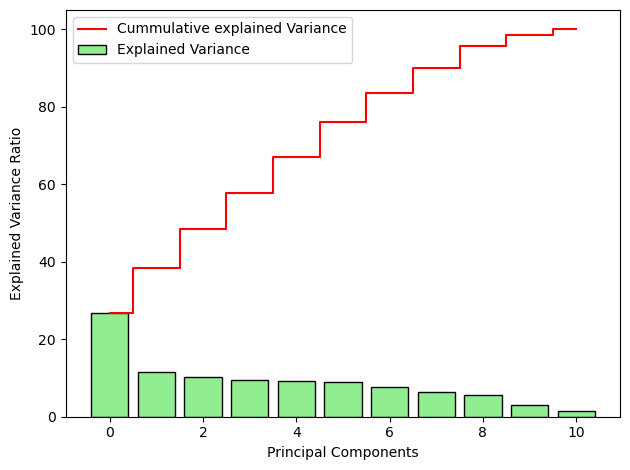

In [43]:
## Scree plot
plt.bar(range(11),var_exp, align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(11), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.show()

* We can see that approximately 95.0% of variance is explained by the first 8 variables. 
* so, we can choose the optimal number of principal components as 8.

In [44]:
## Fitting the PCA model
pca=PCA(n_components = 8)
pca.fit(sc_feat_df)

PCA(n_components=8)

In [45]:
data_pca = pca.transform(sc_feat_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.046871,0.434024,-1.015736,0.682394,1.091185,-0.985924,-0.900206,-0.224881
1,-1.501206,0.643760,0.705912,-0.824976,1.380145,0.409657,-1.219461,-0.501406
2,1.225035,-0.370053,0.251962,-0.050345,-0.848348,0.759241,-0.680986,0.533834
3,-1.693331,-1.164613,-0.350990,-0.364036,-0.806972,0.596875,0.342196,0.361914
4,-0.003188,0.503600,0.683732,0.252396,-0.758904,-1.189182,1.657730,0.956347


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [46]:
cluster_range = range(2,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(data_pca)
    cluster_errors.append(clusters.inertia_)

In [47]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

In [48]:
cluster_df

,num_clusters,cluster_errors
0,2,17266.256431
1,3,15652.664849
2,4,13451.896365
3,5,12334.185929
4,6,11354.516925
5,7,10694.659065
6,8,10148.176879
7,9,9740.645207
8,10,9388.629382
9,11,9053.337515


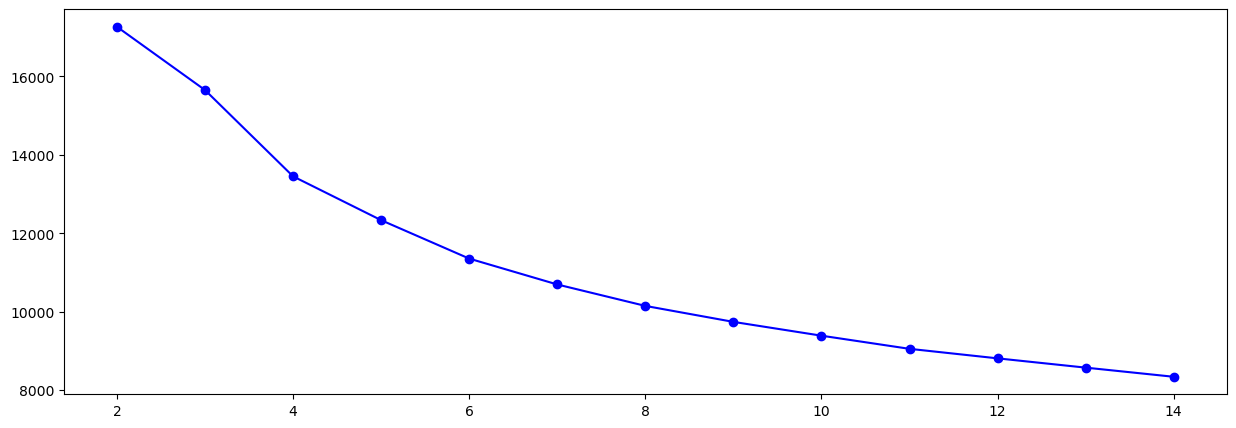

In [49]:
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

* From the Elbow plot, we can see that at K=3 the interia starts to drop significantly. So we will do it using 3 clusters.
* The clusters are labeled as 0,1,2

In [50]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [51]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [52]:
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels['Labels'].value_counts()

0    1273
1     946
2      21
Name: Labels, dtype: int64

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

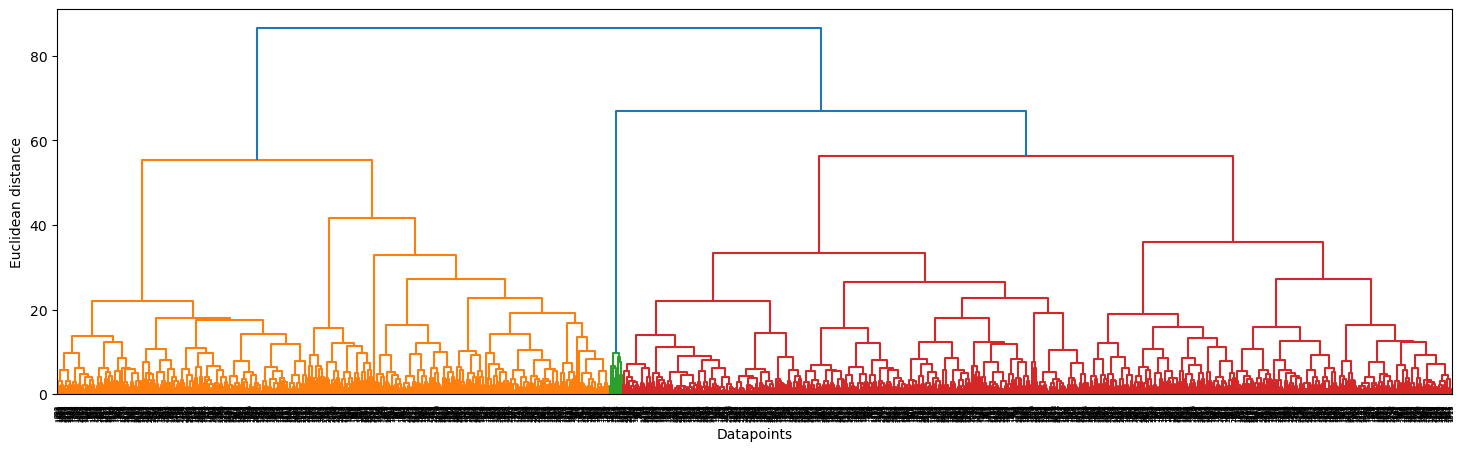

In [53]:
plt.figure(figsize=[18,5])
merg = linkage(sc_feat_df, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(sc_feat_df)
    labels = hier.fit_predict(sc_feat_df)
    print(i,silhouette_score(sc_feat_df,labels))

2 0.16333587200906352
3 0.1755377866041113
4 0.132316015608856
5 0.13071467704036316
6 0.13776769906995529
7 0.127024682355795
8 0.10756494515876425
9 0.10886687627912489
10 0.1088589663740468
11 0.10765728780689865
12 0.10900052428048167
13 0.11121806599894832
14 0.11126627334056445


* from dendrogram and silhouette score we can see that the optimal value for K will be 3

In [56]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(sc_feat_df)

In [57]:
df_label1= pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,0
2,1
3,0
4,0


In [58]:
df_hier = df_cleaned.join(df_label1)
df_hier.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,total_expenses,num_total_purchases,kids,TotalAcceptedCmp,age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,32,0,1,66,1
1,Graduation,Single,46344.0,38,5,0,27,11,2,0,69,0
2,Graduation,relationship,71613.0,26,4,0,776,25,0,0,58,1
3,Graduation,relationship,26646.0,26,6,0,53,14,1,0,39,0
4,PhD,relationship,58293.0,94,5,0,422,24,1,0,42,0


### Visualization and Interpretation of results

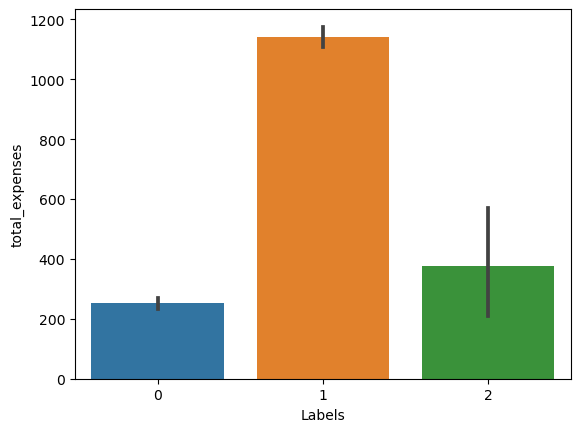

In [61]:
sns.barplot(df_hier['Labels'],df_hier['total_expenses'])
plt.show()

* The total expenses are much higher for cluster 1 

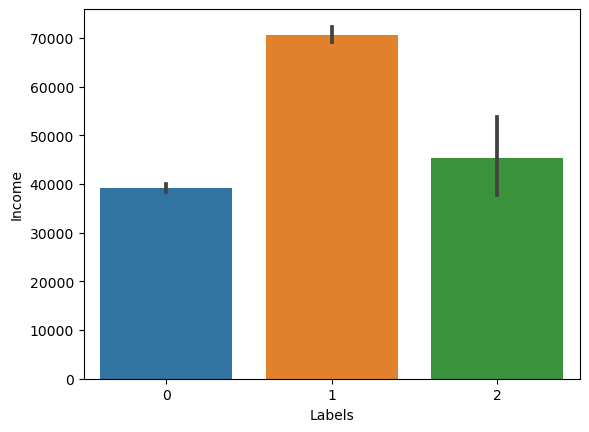

In [62]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

* Income is much higher for cluster 1

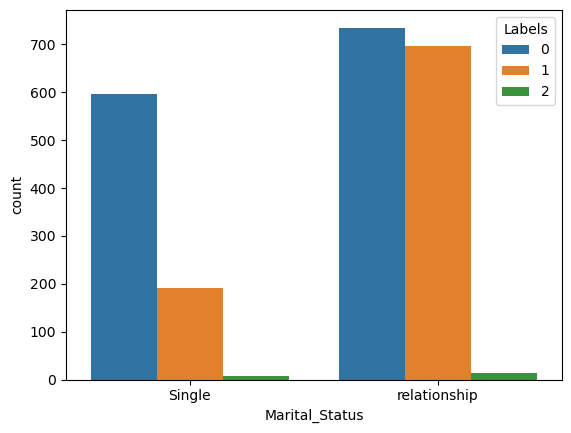

In [63]:
sns.countplot(df_hier['Marital_Status'], hue='Labels',data=df_hier)
plt.show()

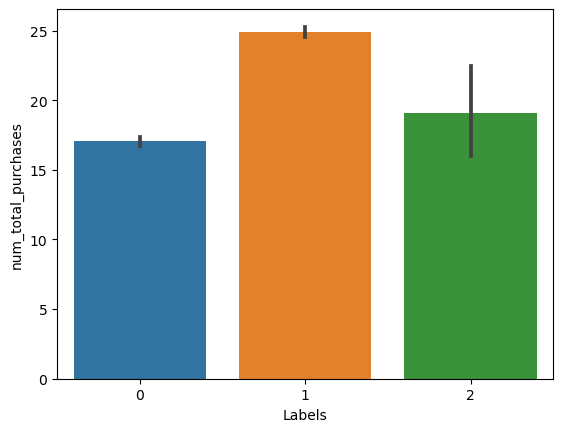

In [64]:
sns.barplot(df_hier['Labels'],df_hier['num_total_purchases'])
plt.show() # cluster 1 has the higher number for purchases

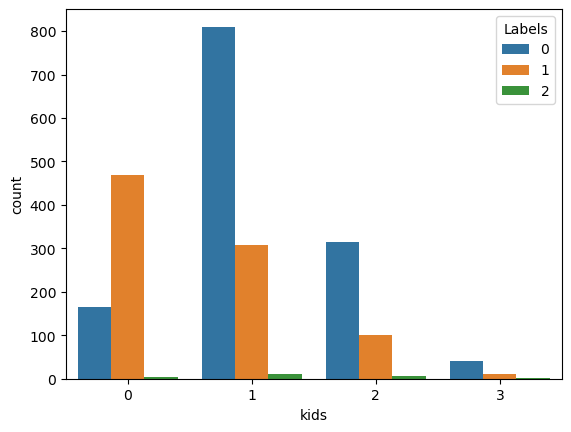

In [65]:
sns.countplot(df_hier['kids'], hue='Labels',data=df_hier)
plt.show()

-----
## Happy Learning
-----